***Dataset*** :
**Estimation of Obesity Levels Based On Eating Habits and Physical Condition**:

 This dataset is designed for classification, aiming to predict an individual's obesity level. The target variable is categorized into seven distinct levels, ranging from underweight to morbid obesity. The prediction is based on 17 input features that capture various aspects of a person's lifestyle, including their eating patterns (frequency of high-calorie food, vegetable intake, meal frequency, snacks), physical activity levels, sedentary behavior (time using technology), substance use (smoking, alcohol), water consumption, health monitoring (calorie intake), family history of obesity, and even transportation habits. The dataset provides a valuable resource for exploring the complex interplay of these factors in determining obesity levels.

Step-1: REQUIRED IMPORTS

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step-2: DATA LOADING AND INSPECTION

In [6]:
import pandas as pd

# Load the dataset correctly
df_obesity = pd.read_csv("Obesity_levels_estimation.csv")

# Display the first 5 rows
print("First 5 rows of Obesity Dataset:")
print(df_obesity.head())

# Display dataset info
print("\nDataset Info:")
print(df_obesity.info())

# Display missing values
print("\nMissing Values:")
print(df_obesity.isna().sum())


First 5 rows of Obesity Dataset:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  

Step-3: CLEAN DATA (ADAPTATION)

In [7]:
# Filling missing numerical columns with median
num_cols_obesity = df_obesity.select_dtypes(include=np.number).columns
for col in num_cols_obesity:
    if df_obesity[col].isna().sum() > 0:
        df_obesity[col] = df_obesity[col].fillna(df_obesity[col].median())

# Filling categorical columns with mode
cat_cols_obesity = df_obesity.select_dtypes(include='object').columns
for col in cat_cols_obesity:
    if df_obesity[col].isna().sum() > 0:
        df_obesity[col] = df_obesity[col].fillna(df_obesity[col].mode()[0])

# Encode categorical variables (adapt mappings based on Obesity dataset)
df_obesity['Gender'] = df_obesity['Gender'].map({'Female': 0, 'Male': 1})
df_obesity['family_history_with_overweight'] = df_obesity['family_history_with_overweight'].map({'no': 0, 'yes': 1})
df_obesity['FAVC'] = df_obesity['FAVC'].map({'no': 0, 'yes': 1})
df_obesity['CAEC'] = df_obesity['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df_obesity['SMOKE'] = df_obesity['SMOKE'].map({'no': 0, 'yes': 1})
df_obesity['CALC'] = df_obesity['CALC'].map({'I do not drink': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})
df_obesity['SCC'] = df_obesity['SCC'].map({'no': 0, 'yes': 1})

# For 'MTRANS', you have more categories. You can use one-hot encoding if needed later.
# Example of getting unique values: print(df_obesity['MTRANS'].unique())

# Display missing values after handling
print("\nMissing Values After Cleaning (Obesity Dataset):")
print(df_obesity.isna().sum())

# Display first 5 rows after cleaning
print("\nFirst 5 rows After Cleaning (Obesity Dataset):")
print(df_obesity.head())


Missing Values After Cleaning (Obesity Dataset):
Gender                              0
Age                                 0
Height                              0
Weight                              0
family_history_with_overweight      0
FAVC                                0
FCVC                                0
NCP                                 0
CAEC                                0
SMOKE                               0
CH2O                                0
SCC                                 0
FAF                                 0
TUE                                 0
CALC                              639
MTRANS                              0
NObeyesdad                          0
dtype: int64

First 5 rows After Cleaning (Obesity Dataset):
   Gender   Age  Height  Weight  family_history_with_overweight  FAVC  FCVC  \
0       0  21.0    1.62    64.0                               1     0   2.0   
1       0  21.0    1.52    56.0                               1     0   3.0   
2     

Step-4:DATA ANALYSIS OPERATIONS(Adaptation)

In [12]:
# Basic analysis with Numpy and Pandas

# Using 'Age' as a similar numerical column
ages_obesity = df_obesity['Age'].values

# 1. Array Slicing
print("\nArray Slicing Examples (Obesity Dataset - Age):")
print("First 5 ages:", ages_obesity[:5])
print("Every second age:", ages_obesity[::2][:5])
print("Reverse order (first 5):", ages_obesity[::-1][:5])



Array Slicing Examples (Obesity Dataset - Age):
First 5 ages: [21. 21. 23. 27. 22.]
Every second age: [21. 23. 22. 23. 24.]
Reverse order (first 5): [23.664709 24.361936 22.524036 21.982942 20.976842]


In [13]:
# 2. Universal Functions (ufuncs)
print("\nUniversal Functions Examples (Obesity Dataset - Age):")
print("Log of age (add 1):", np.log(ages_obesity + 1)[:5])
print("Square root of age:", np.sqrt(ages_obesity[:5]))



Universal Functions Examples (Obesity Dataset - Age):
Log of age (add 1): [3.09104245 3.09104245 3.17805383 3.33220451 3.13549422]
Square root of age: [4.58257569 4.58257569 4.79583152 5.19615242 4.69041576]


In [14]:
# 3. Aggregations
print("\nAggregation Examples (Obesity Dataset):")
print("Max age:", np.max(ages_obesity))
print("Min water intake (CH2O):", np.min(df_obesity['CH2O']))
print("Mean frequency of physical activity (FAF):", np.mean(df_obesity['FAF']))


Aggregation Examples (Obesity Dataset):
Max age: 61.0
Min water intake (CH2O): 1.0
Mean frequency of physical activity (FAF): 1.0102976958787304


In [15]:
# 4. Broadcasting
print("\nBroadcasting Example (Obesity Dataset - Age):")
normalized_age_obesity = (ages_obesity - ages_obesity.mean()) / ages_obesity.std()
print("First 5 normalized ages (z-score):", normalized_age_obesity[:5])


Broadcasting Example (Obesity Dataset - Age):
First 5 normalized ages (z-score): [-0.52212439 -0.52212439 -0.20688898  0.42358183 -0.36450668]


In [16]:
# 5. Boolean Masking (Adapt condition)
active_vegetable_eaters = df_obesity[(df_obesity['FAF'] > 2) & (df_obesity['FCVC'] > 1)]
print("\nActive people with frequent vegetable consumption:", active_vegetable_eaters.shape[0])



Active people with frequent vegetable consumption: 188


In [17]:
# 6. Sorting with argsort (Adapt column)
age_sorted_indices_obesity = np.argsort(ages_obesity)
print("\nSorting with argsort (Obesity Dataset - Age):")
print("Indices of 5 youngest people:", age_sorted_indices_obesity[:5])
print("Youngest ages:", ages_obesity[age_sorted_indices_obesity[:5]])



Sorting with argsort (Obesity Dataset - Age):
Indices of 5 youngest people: [415 116 309 295 303]
Youngest ages: [14. 15. 16. 16. 16.]


In [18]:
# 7. Partial Sorting (Adapt column)
five_smallest_ages_obesity = np.partition(ages_obesity, 5)[:5]
print("\nPartial Sorting (np.partition) (Obesity Dataset - Age):")
print("Five smallest ages (unsorted):", five_smallest_ages_obesity)



Partial Sorting (np.partition) (Obesity Dataset - Age):
Five smallest ages (unsorted): [14. 15. 16. 16. 16.]


In [19]:
# 8. Structured Array (Adapt columns and data types)
structured_obesity = np.array(list(zip(df_obesity['Age'], df_obesity['Gender'], df_obesity['Height'])),
                              dtype=[('Age', 'f4'), ('Gender', 'i4'), ('Height', 'f4')])
print("\nStructured Array Example (Obesity Dataset - Age, Gender, Height - first 3 rows):", structured_obesity[:3])
print("People with height < 1.5 meters:", structured_obesity[structured_obesity['Height'] < 1.5])


Structured Array Example (Obesity Dataset - Age, Gender, Height - first 3 rows): [(21., 0, 1.62) (21., 0, 1.52) (23., 1, 1.8 )]
People with height < 1.5 meters: [(23.      , 0, 1.48    ) (18.      , 0, 1.45    )
 (18.      , 0, 1.456346) (18.      , 0, 1.498561)
 (17.420269, 0, 1.489409) (22.154854, 0, 1.481682)
 (21.082384, 0, 1.486484) (21.95994 , 0, 1.483284)
 (21.82165 , 0, 1.491441)]


In [20]:
# 9. Hierarchical Indexing (MultiIndex in Pandas) (Adapt index columns)
multi_df_obesity = df_obesity.set_index(['MTRANS', 'Gender'])
print("\nHierarchical Indexing (MultiIndex) (Obesity Dataset - MTRANS, Gender):")
try:
    print("\nWeight for Public_Transportation (Female):\n", multi_df_obesity.loc[('Public_Transportation', 0), 'Weight'].head())
except KeyError:
    print("\nNo data found for ('Public_Transportation', 0) in the index.")



Hierarchical Indexing (MultiIndex) (Obesity Dataset - MTRANS, Gender):

Weight for Public_Transportation (Female):
 MTRANS                 Gender
Public_Transportation  0         64.0
                       0         56.0
                       0         80.0
                       0         66.0
                       0         70.0
Name: Weight, dtype: float64


<ipython-input-20-6ce9271df7e2>:5: PerformanceWarning: indexing past lexsort depth may impact performance.
  print("\nWeight for Public_Transportation (Female):\n", multi_df_obesity.loc[('Public_Transportation', 0), 'Weight'].head())


In [21]:
#10. Basic Statistics (Adapt columns)
print("\nBasic Statistics (Obesity Dataset):")
print("Mean Weight:", np.mean(df_obesity['Weight']))
print("\nMedian Number of Main Meals (NCP):", np.median(df_obesity['NCP']))
print("\nStandard Deviation of Time Using Technology Devices (TUE):", np.std(df_obesity['TUE']))
print("\n", df_obesity.describe())

# Filter people with high water intake (Adapt condition and column)
high_water = df_obesity[df_obesity['CH2O'] > 2.5]
print("\nIndividuals with high water intake:\n", high_water[['Age', 'CH2O']].head())


Basic Statistics (Obesity Dataset):
Mean Weight: 86.58605812648035

Median Number of Main Meals (NCP): 3.0

Standard Deviation of Time Using Technology Devices (TUE): 0.6087830153868534

             Gender          Age       Height       Weight  \
count  2111.000000  2111.000000  2111.000000  2111.000000   
mean      0.505921    24.312600     1.701677    86.586058   
std       0.500083     6.345968     0.093305    26.191172   
min       0.000000    14.000000     1.450000    39.000000   
25%       0.000000    19.947192     1.630000    65.473343   
50%       1.000000    22.777890     1.700499    83.000000   
75%       1.000000    26.000000     1.768464   107.430682   
max       1.000000    61.000000     1.980000   173.000000   

       family_history_with_overweight         FAVC         FCVC          NCP  \
count                     2111.000000  2111.000000  2111.000000  2111.000000   
mean                         0.817622     0.883941     2.419043     2.685628   
std                  

In [22]:
#11.Advanced Analysis
# Group by a categorical column and average a numerical feature
occupation_weight = df_obesity.groupby('MTRANS')['Weight'].mean()
print("\nAverage Weight by Transportation Mode:")
print(occupation_weight)

# Pivot tables (Adapt index, columns, and values)
# Rename the 'NObeyesdad' column to 'NObesity'
df_obesity = df_obesity.rename(columns={'NObeyesdad': 'NObesity'})
pivot_activity = pd.pivot_table(df_obesity, values='FAF', index='NObesity', columns='Gender', aggfunc='mean')
print("\nPivot Table - Physical Activity by Obesity Level and Gender:")
print(pivot_activity)

# Equivalent to pivot1 using groupby (Adapt index and values)
grouped_obesity_activity = df_obesity.groupby('NObesity')['FAF'].mean()
print("\nGroupBy Comparison - Physical Activity by Obesity Level:")
print(grouped_obesity_activity)

# Equivalent to pivot2 using groupby + unstack (Adapt index, columns, and values)
grouped_mtrans_gender_weight = df_obesity.groupby(['MTRANS', 'Gender'])['Weight'].mean().unstack()
print("\nGroupBy Comparison - Weight by Transportation Mode and Gender:")
print(grouped_mtrans_gender_weight)


Average Weight by Transportation Mode:
MTRANS
Automobile               85.907619
Bike                     76.714286
Motorbike                73.090909
Public_Transportation    87.486712
Walking                  70.596108
Name: Weight, dtype: float64

Pivot Table - Physical Activity by Obesity Level and Gender:
Gender                      0         1
NObesity                               
Insufficient_Weight  1.113127  1.489543
Normal_Weight        1.099291  1.390411
Obesity_Type_I       0.703095  1.213671
Obesity_Type_II      1.000000  0.971666
Obesity_Type_III     0.660683  2.000000
Overweight_Level_I   0.882983  1.230609
Overweight_Level_II  0.804625  1.042591

GroupBy Comparison - Physical Activity by Obesity Level:
NObesity
Insufficient_Weight    1.250131
Normal_Weight          1.247387
Obesity_Type_I         0.986748
Obesity_Type_II        0.971857
Obesity_Type_III       0.664817
Overweight_Level_I     1.056796
Overweight_Level_II    0.958072
Name: FAF, dtype: float64

GroupBy C

Step-4: DATA VISUALIZATION (ADAPT COLUMNS AND TITLES)

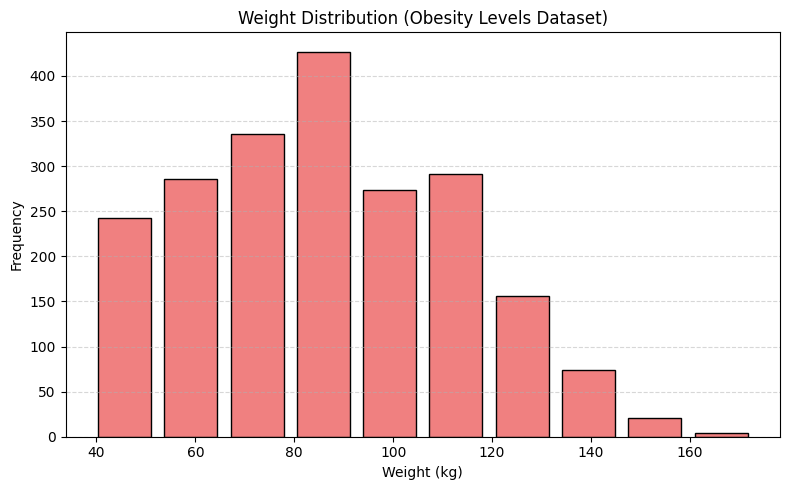

In [23]:
# A. Basic Matplotlib Plots
# Histogram of Weight
counts_obesity, bins_obesity = np.histogram(df_obesity['Weight'], bins=10)
bin_centers_obesity = 0.5 * (bins_obesity[1:] + bins_obesity[:-1])
plt.figure(figsize=(8, 5))
plt.bar(bin_centers_obesity, counts_obesity, width=(bins_obesity[1] - bins_obesity[0]) * 0.8, color='lightcoral', edgecolor='black')
plt.title("Weight Distribution (Obesity Levels Dataset)")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

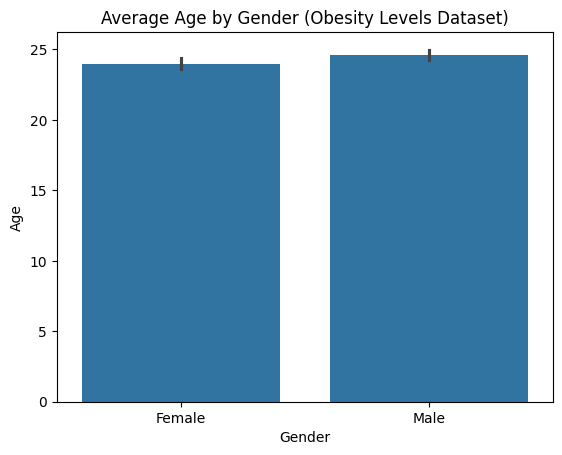

In [9]:
# B. Seaborn Visualizations
# Bar Plot - Average Age by Gender
sns.barplot(x='Gender', y='Age', data=df_obesity)
plt.title("Average Age by Gender (Obesity Levels Dataset)")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

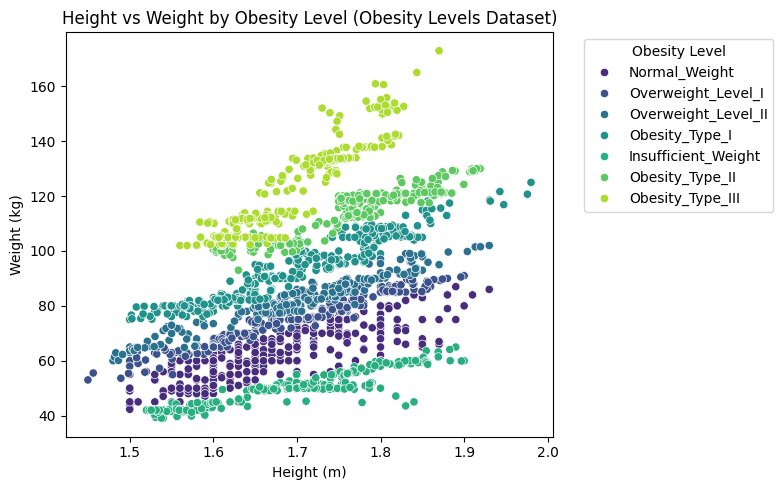

In [24]:
# Scatter Plot - Height vs Weight by Obesity Level
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Height', y='Weight', hue='NObesity', data=df_obesity, palette='viridis')
plt.title("Height vs Weight by Obesity Level (Obesity Levels Dataset)")
plt.xlabel("Height (m)")
plt.ylabel("Weight (kg)")
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

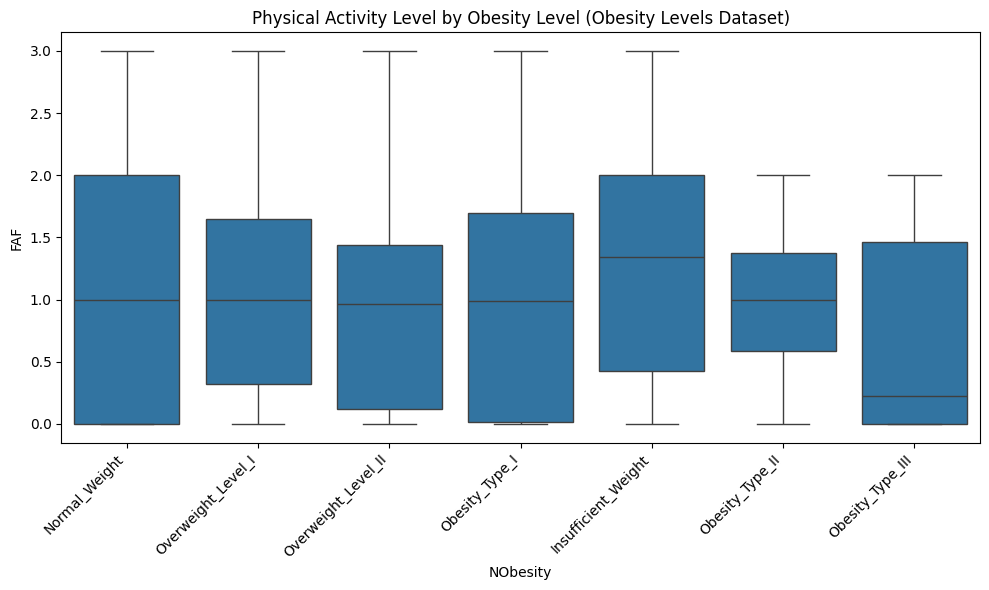

In [25]:
# Boxplot - Physical Activity Level by Obesity Level
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObesity', y='FAF', data=df_obesity)
plt.title("Physical Activity Level by Obesity Level (Obesity Levels Dataset)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Step-5: ADVANCED NUMPY OPERATIONS (ADPAT COLUMNS)

In [26]:
#Normalize the Weight column (Z-score)
weight_mean_obesity = np.mean(df_obesity['Weight'])
weight_std_obesity = np.std(df_obesity['Weight'])
df_obesity['Weight_zscore'] = (df_obesity['Weight'] - weight_mean_obesity) / weight_std_obesity
print("\nFirst 5 rows with normalized weight (Obesity Dataset):")
print(df_obesity[['Weight', 'Weight_zscore']].head())


First 5 rows with normalized weight (Obesity Dataset):
   Weight  Weight_zscore
0    64.0      -0.862558
1    56.0      -1.168077
2    77.0      -0.366090
3    87.0       0.015808
4    89.8       0.122740


In [27]:
#Boolean Indexing with NumPy: Age between 20 and 30
young_adults_obesity = df_obesity[np.logical_and(ages_obesity >= 20, ages_obesity <= 30)]
print(f"\nNumber of adults aged 20–30 (Obesity Dataset): {len(young_adults_obesity)}")
print("Sample:")
print(young_adults_obesity[['Age', 'Gender', 'MTRANS', 'Weight', 'FAF']].head())


Number of adults aged 20–30 (Obesity Dataset): 1218
Sample:
    Age  Gender                 MTRANS  Weight  FAF
0  21.0       0  Public_Transportation    64.0  0.0
1  21.0       0  Public_Transportation    56.0  3.0
2  23.0       1  Public_Transportation    77.0  2.0
3  27.0       1                Walking    87.0  2.0
4  22.0       1  Public_Transportation    89.8  0.0


In [28]:
# New Column: BMI (Body Mass Index)
df_obesity['BMI'] = df_obesity['Weight'] / (df_obesity['Height'] ** 2)
print("\nNew column 'BMI' added (Obesity Dataset):")
print(df_obesity[['Weight', 'Height', 'BMI']].head())


New column 'BMI' added (Obesity Dataset):
   Weight  Height        BMI
0    64.0    1.62  24.386526
1    56.0    1.52  24.238227
2    77.0    1.80  23.765432
3    87.0    1.80  26.851852
4    89.8    1.78  28.342381


In [29]:
# Group by a categorical column
grouped_stats_obesity = df_obesity.groupby('NObesity')[['Weight', 'FAF']].mean()
print("\nAverage Weight and Physical Activity Level by Obesity Level (Obesity Dataset):")
print(grouped_stats_obesity)


Average Weight and Physical Activity Level by Obesity Level (Obesity Dataset):
                         Weight       FAF
NObesity                                 
Insufficient_Weight   49.906330  1.250131
Normal_Weight         62.155052  1.247387
Obesity_Type_I        92.870198  0.986748
Obesity_Type_II      115.305311  0.971857
Obesity_Type_III     120.941114  0.664817
Overweight_Level_I    74.266828  1.056796
Overweight_Level_II   82.085271  0.958072


In [30]:
# Pivot Tables
# Pivot Table 1: Average Height per Obesity Level
pivot1_obesity = pd.pivot_table(df_obesity, index='NObesity', values='Height', aggfunc='mean')
print("\nPivot Table 1 - Average Height by Obesity Level (Obesity Dataset):")
print(pivot1_obesity)

# Pivot Table 2: Mean Weight per Transportation Mode and Gender
pivot2_obesity = pd.pivot_table(df_obesity, index='MTRANS', columns='Gender', values='Weight', aggfunc='mean')
print("\nPivot Table 2 - Mean Weight by Transportation Mode and Gender (Obesity Dataset):")
print(pivot2_obesity)

# Pivot Table 3: Average Age by Family History and Gender
pivot3_obesity = pd.pivot_table(df_obesity, index='family_history_with_overweight', columns='Gender', values='Age', aggfunc='mean')
print("\nPivot Table 3 - Average Age by Family History and Gender (Obesity Dataset):")
print(pivot3_obesity)

# Equivalent to pivot1 using groupby
grouped_obesity_height = df_obesity.groupby('NObesity')['Height'].mean()
print("\nGroupBy Comparison - Average Height by Obesity Level (Obesity Dataset):")
print(grouped_obesity_height)

# Equivalent to pivot2 using groupby + unstack
grouped_mtrans_gender_weight_obesity = df_obesity.groupby(['MTRANS', 'Gender'])['Weight'].mean().unstack()
print("\nGroupBy Comparison - Weight by Transportation Mode and Gender (Obesity Dataset):")
print(grouped_mtrans_gender_weight_obesity)


Pivot Table 1 - Average Height by Obesity Level (Obesity Dataset):
                       Height
NObesity                     
Insufficient_Weight  1.691117
Normal_Weight        1.676585
Obesity_Type_I       1.693804
Obesity_Type_II      1.771795
Obesity_Type_III     1.687559
Overweight_Level_I   1.687836
Overweight_Level_II  1.703748

Pivot Table 2 - Mean Weight by Transportation Mode and Gender (Obesity Dataset):
Gender                         0          1
MTRANS                                     
Automobile             73.580426  92.939626
Bike                         NaN  76.714286
Motorbike              65.000000  74.888889
Public_Transportation  84.573203  90.913898
Walking                60.547619  76.625202

Pivot Table 3 - Average Age by Family History and Gender (Obesity Dataset):
Gender                                  0          1
family_history_with_overweight                      
0                               20.842394  22.620493
1                               24.9